In [303]:
import pandas as pd
import matplotlib.pyplot as plt

In [304]:
def correct_string(line: str, A_before: int) -> (list, int):
    """
    Turns one line of the string into a list with values for all these cols (15)
    'N', 'Z', 'A', 'El', 'Orig', 'Mass Excess (keV)', 'ME Unc',
       'Binding Energy/A (keV)', 'BE/A Unc', 'Beta-decay Type',
       'Beta-decay Energy (keV)', 'BE Unc', 'N Protons',
       'Atomic Mass (micro-u)', 'AM Unc'
    """
    N = int(line[2:9].strip())
    Z = int(line[10:14].strip())
    
    A_test = line[15:19].strip()
    if A_test == "":  # Can be empty
        A = A_before
    else:
        A = int(A_test)
    
    El = line[20:22].strip()
    Orig = line[23:27].strip()
    mass_excess = line[28:41].strip()  # missing convertion for # is str for now
    mass_excess_unc = line[42:52].strip() # missing convertion for # is str for now
    b_energya = line[53:63].strip() # missing convertion for # is str for now
    b_energya_unc = line[63:72].strip() # missing convertion for # is str for now
    b_type = line[72:75].strip()
    b_energy = line[75:86].strip() # missing convertion for # and * is str for now
    b_energy_unc = line[87:95].strip() # missing convertion for # and * is str for now
    n_protons = int(line[96:99].strip())
    a_mass = line[99:112].strip() # missing convertion for # and * is str for now
    am_unc = line[112:].strip() # missing convertion for # and * is str for now
    
    output_values = [
        N, Z, A, El, Orig, mass_excess, mass_excess_unc, b_energya, b_energya_unc,
        b_type, b_energy, b_energy_unc, n_protons, a_mass, am_unc
    ]
    return output_values, A
    

In [305]:
file1 = open('massround.mas20.txt', 'r')
Lines = file1.readlines()

In [306]:
pd_cols = Lines[32].rsplit()[1:]
df = pd.DataFrame(columns=pd_cols)
df = df.rename(columns={"Mass": "Mass Excess (keV)", "Excess": "ME Unc", "Binding": "Binding Energy/A (keV)",
                  "Energy/A": "BE/A Unc", "Beta-decay": "Beta-decay Type",
                   "Energy": "Beta-decay Energy (keV)", "Atomic": "BE Unc"})
df = df.iloc[:,:-1]
df["N Protons"] = None
df["Atomic Mass (micro-u)"] = None
df["AM Unc"] = None

In [307]:
line_number = 34
a_before = 0

for i in range(len(Lines[34:])):
    try:
        value_list, a_temp = correct_string(Lines[line_number + i], a_before)
        a_before = a_temp  # This values sometimes does not change so it is saved between loops
        df.loc[i] = value_list
    except Exception as e:
        print(i, e)

In [308]:
df

,N,Z,A,El,Orig,Mass Excess (keV),ME Unc,Binding Energy/A (keV),BE/A Unc,Beta-decay Type,Beta-decay Energy (keV),BE Unc,N Protons,Atomic Mass (micro-u),AM Unc
0,1,0,1,n,,8071.3181,0.0004,0.0,0.0,B-,782.347,a,1,008664.9159,0.0005
1,0,1,1,H,,7288.97106,0.00001,0.0,0.0,,*,,1,007825.03190,0.00001
2,1,1,2,H,,13135.72290,0.00002,1112.283,a,,*,,2,014101.77784,0.00002
3,2,1,3,H,,14949.81090,0.00008,2827.265,a,B-,18.592,a,3,016049.28132,0.00008
4,1,2,3,He,,14931.21888,0.00006,2572.680,a,,*,,3,016029.32197,0.00006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,176,117,293,Ts,-a,194430#,780#,7095#,3#,B+,3860#,930#,293,208730#,840#
3554,175,118,293,Og,-a,198800#,710#,7078#,2#,B+,4370#,1050#,293,213420#,760#
3555,177,117,294,Ts,-a,196400#,590#,7092#,2#,,*,,294,210840#,640#
3556,176,118,294,Og,-a,199320#,550#,7079#,2#,B+,2920#,810#,294,213980#,590#


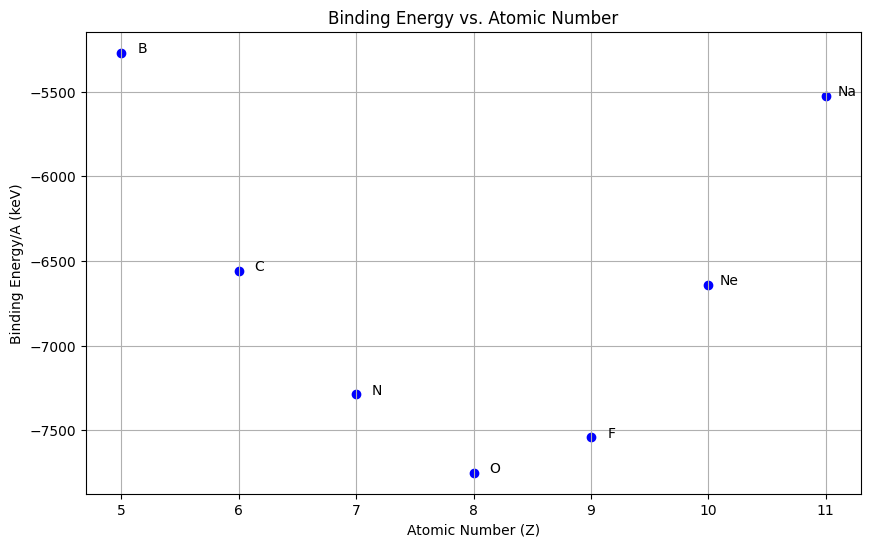

In [320]:
values = df.loc[df["A"] == 17, ["Z", "Binding Energy/A (keV)", "El"]]
values["Binding Energy/A (keV)"] = values["Binding Energy/A (keV)"].astype(float)

plt.figure(figsize=(10, 6))
# Scatter plot
plt.scatter(values['Z'], -values['Binding Energy/A (keV)'], marker='o', color='blue')

# Adding annotations
for i, txt in zip(values['El'].index, values['El'].values):
    plt.annotate(txt, (values['Z'][i], -values['Binding Energy/A (keV)'][i]), 
                 textcoords="offset points", xytext=(15,0), ha='center')

# Adding labels and title
plt.ylabel('Binding Energy/A (keV)')
plt.xlabel('Atomic Number (Z)')
plt.title('Binding Energy vs. Atomic Number')

# Display the plot
plt.grid(":")
plt.show()

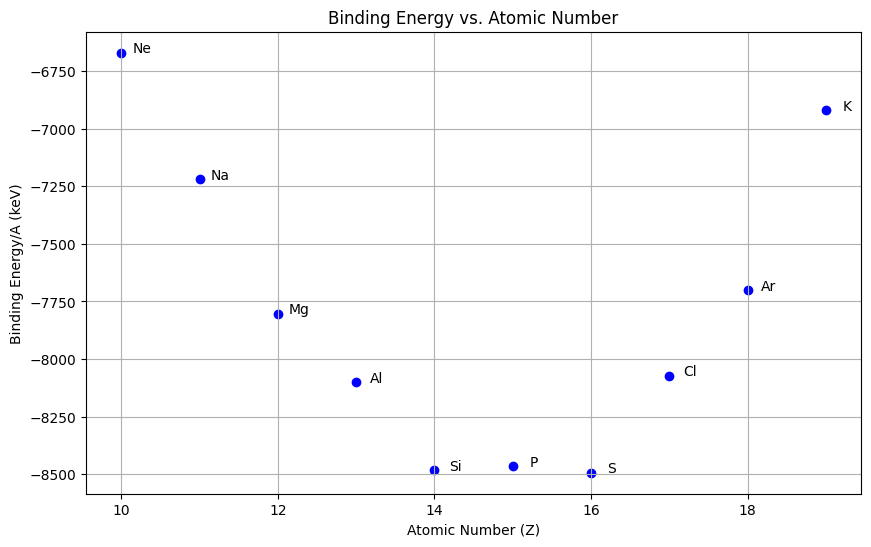

In [321]:
values = df.loc[df["A"] == 32, ["Z", "Binding Energy/A (keV)", "El"]]
values["Binding Energy/A (keV)"] = values["Binding Energy/A (keV)"].str.replace("#", "").astype(float)

plt.figure(figsize=(10, 6))
# Scatter plot
plt.scatter(values['Z'], -values['Binding Energy/A (keV)'], marker='o', color='blue')

# Adding annotations
for i, txt in zip(values['El'].index, values['El'].values):
    plt.annotate(txt, (values['Z'][i], -values['Binding Energy/A (keV)'][i]), 
                 textcoords="offset points", xytext=(15,0), ha='center')

# Adding labels and title
plt.ylabel('Binding Energy/A (keV)')
plt.xlabel('Atomic Number (Z)')
plt.title('Binding Energy vs. Atomic Number')

# Display the plot
plt.grid(":")
plt.show()